In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

print("✅ Entorno listo y librerías cargadas")


✅ Entorno listo y librerías cargadas


In [253]:
# Directorio donde están los archivos .csv (uno por año)
data_path = "../data/"

# Buscar todos los archivos CSV dentro del directorio
files = [f for f in os.listdir(data_path) if f.endswith(".csv")]
print("Archivos CSV encontrados:", files)

# Leer y combinar los datasets
df_list = []
for file in files:
    year = file.split(".")[0]                     # extrae el año del nombre del archivo
    temp = pd.read_csv(os.path.join(data_path, file))
    temp["Year"] = year                           # agrega columna con el año
    df_list.append(temp)

# Unir todos los años en un solo DataFrame
df = pd.concat(df_list, ignore_index=True)
print("Shape final:", df.shape)
df.head()


Archivos CSV encontrados: ['2015.csv', '2016.csv', '2017.csv', '2018.csv', '2019.csv']
Shape final: (782, 31)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [254]:
print("Antes de limpiar:", df.columns.tolist())

# Normalizar nombres
df.columns = (
    df.columns
    .str.strip()          # quita espacios al inicio y final
    .str.lower()          # pasa todo a minúsculas
    .str.replace(' ', '_')
    .str.replace('.', '_')
)

print("\nDespués de limpiar:", df.columns.tolist())


Antes de limpiar: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', 'Year', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Health..Life.Expectancy.', 'Trust..Government.Corruption.', 'Dystopia.Residual', 'Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption']

Después de limpiar: ['country', 'region', 'happiness_rank', 'happiness_score', 'standard_error', 'economy_(gdp_per_capita)', 'family', 'health_(life_expectancy)', 'freedom', 'trust_(government_corruption)', 'generosity', 'dystopia_residual', 'year', 'lower_confidence_interval', 'upper_confidence_interval', 'happiness_rank', 'happiness_score', 

In [255]:
duplicadas = []

for i, col1 in enumerate(df.columns):
    for col2 in df.columns[i + 1:]:
        if df[col1].equals(df[col2]):  # compara contenido real
            duplicadas.append((col1, col2))
            print(f"Columnas idénticas: {col1} ↔ {col2}")

if not duplicadas:
    print("✅ No se encontraron columnas duplicadas.")
else:
    print(f"⚠️ {len(duplicadas)} pares de columnas duplicadas encontradas.")


Columnas idénticas: happiness_rank ↔ happiness_rank
Columnas idénticas: happiness_score ↔ happiness_score
Columnas idénticas: dystopia_residual ↔ dystopia_residual
⚠️ 3 pares de columnas duplicadas encontradas.


In [256]:
# Calcular cantidad y porcentaje de nulos
nulos_abs = df.isna().sum()
nulos_pct = (nulos_abs / len(df)) * 100

# Crear tabla ordenada
tabla_nulos = (
    pd.DataFrame({'columna': nulos_abs.index, 'nulos': nulos_abs.values, 'porcentaje': nulos_pct.values})
    .sort_values(by='porcentaje', ascending=False)
    .reset_index(drop=True)
)

print("📋 Porcentaje de valores nulos por columna (de mayor a menor):")
display(tabla_nulos)


📋 Porcentaje de valores nulos por columna (de mayor a menor):


,columna,nulos,porcentaje
0,trust__government_corruption_,627,80.179028
1,health__life_expectancy_,627,80.179028
2,economy__gdp_per_capita_,627,80.179028
3,whisker_low,627,80.179028
4,whisker_high,627,80.179028
5,happiness_score,627,80.179028
6,happiness_rank,627,80.179028
7,dystopia_residual,627,80.179028
8,lower_confidence_interval,625,79.923274
9,upper_confidence_interval,625,79.923274


In [257]:
# Eliminar columnas con más del 70% de nulos
columnas_a_eliminar = nulos_pct[nulos_pct > 70].index.tolist()
df.drop(columns=columnas_a_eliminar, inplace=True)
print("Columnas eliminadas (>70% nulos):", columnas_a_eliminar)

# Rellenar categorías y valores numéricos
if 'region' in df.columns:
    df['region'] = df['region'].fillna('Desconocido')

for col in df.select_dtypes(include=['float', 'int']).columns:
    if df[col].isna().sum() > 0:
        media = df[col].mean()
        df[col].fillna(media, inplace=True)
        print(f"🧮 '{col}' rellenada con su media ({media:.2f})")

# Verificar resultado final
print("\n🔎 Nulos restantes:")
print(df.isna().sum()[df.isna().sum() > 0])


Columnas eliminadas (>70% nulos): ['standard_error', 'lower_confidence_interval', 'upper_confidence_interval', 'happiness_rank', 'happiness_score', 'whisker_high', 'whisker_low', 'economy__gdp_per_capita_', 'health__life_expectancy_', 'trust__government_corruption_', 'dystopia_residual']
🧮 'economy_(gdp_per_capita)' rellenada con su media (0.90)
🧮 'family' rellenada con su media (0.99)
🧮 'health_(life_expectancy)' rellenada con su media (0.59)
🧮 'freedom' rellenada con su media (0.40)
🧮 'trust_(government_corruption)' rellenada con su media (0.14)
🧮 'overall_rank' rellenada con su media (78.50)
🧮 'score' rellenada con su media (5.39)
🧮 'gdp_per_capita' rellenada con su media (0.90)
🧮 'social_support' rellenada con su media (1.21)
🧮 'healthy_life_expectancy' rellenada con su media (0.66)
🧮 'freedom_to_make_life_choices' rellenada con su media (0.42)
🧮 'perceptions_of_corruption' rellenada con su media (0.11)

🔎 Nulos restantes:
country              312
country_or_region    470
dtype: in

In [258]:
if 'country' in df.columns and 'country_or_region' in df.columns:
    print("🔄 Fusionando columnas 'country' y 'country_or_region'...")
    df['country'] = df['country'].fillna(df['country_or_region'])
    df.drop(columns=['country_or_region'], inplace=True)
    print("✅ Columna 'country_or_region' eliminada.")


🔄 Fusionando columnas 'country' y 'country_or_region'...
✅ Columna 'country_or_region' eliminada.


In [259]:
print("Shape final:", df.shape)
print("Columnas finales:", df.columns.tolist())
print("\nResumen general (solo numéricas):")
display(df.describe())


Shape final: (782, 16)
Columnas finales: ['country', 'region', 'economy_(gdp_per_capita)', 'family', 'health_(life_expectancy)', 'freedom', 'trust_(government_corruption)', 'generosity', 'year', 'overall_rank', 'score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'perceptions_of_corruption']

Resumen general (solo numéricas):


,economy_(gdp_per_capita),family,health_(life_expectancy),freedom,trust_(government_corruption),generosity,overall_rank,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,perceptions_of_corruption
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,0.899837,0.990347,0.594054,0.402828,0.140532,0.218576,78.500000,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299
std,0.260464,0.246975,0.152679,0.116515,0.073229,0.122321,28.462748,0.703373,0.249002,0.189507,0.159478,0.098457,0.060082
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.899837,0.953977,0.594054,0.392813,0.135282,0.130000,78.500000,5.391506,0.898298,1.211026,0.661295,0.423538,0.103000
50%,0.899837,0.990347,0.594054,0.402828,0.140532,0.201982,78.500000,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299
75%,0.899837,1.082465,0.594054,0.449940,0.140532,0.278832,78.500000,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299
max,1.824270,1.610574,1.025250,0.669730,0.551910,0.838075,156.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.457000


In [260]:
# ===========================================================
# 📊 DETECCIÓN DE OUTLIERS CON MÉTODO IQR
# ===========================================================

# 1️⃣ Seleccionamos solo columnas numéricas
numericas = df.select_dtypes(include='number')

# 2️⃣ Creamos una tabla vacía donde guardaremos resultados
outliers_info = []

# 3️⃣ Recorremos cada columna numérica
for col in numericas.columns:
    Q1 = numericas[col].quantile(0.25)
    Q3 = numericas[col].quantile(0.75)
    IQR = Q3 - Q1

    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

    # Detectar cuántos valores están fuera del rango
    outliers = numericas[(numericas[col] < lim_inf) | (numericas[col] > lim_sup)]

    outliers_info.append({
        'columna': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lim_inf': lim_inf,
        'lim_sup': lim_sup,
        'outliers_detectados': len(outliers)
    })

# 4️⃣ Mostrar resultados en tabla
tabla_outliers = pd.DataFrame(outliers_info).sort_values(by='outliers_detectados', ascending=False)
display(tabla_outliers)


,columna,Q1,Q3,IQR,lim_inf,lim_sup,outliers_detectados
0,economy_(gdp_per_capita),0.899837,0.899837,0.000000,0.899837,0.899837,315
2,health_(life_expectancy),0.594054,0.594054,0.000000,0.594054,0.594054,315
8,gdp_per_capita,0.898298,0.898298,0.000000,0.898298,0.898298,312
7,score,5.391506,5.391506,0.000000,5.391506,5.391506,312
6,overall_rank,78.500000,78.500000,0.000000,78.500000,78.500000,312
11,freedom_to_make_life_choices,0.423538,0.423538,0.000000,0.423538,0.423538,312
10,healthy_life_expectancy,0.661295,0.661295,0.000000,0.661295,0.661295,312
9,social_support,1.211026,1.211026,0.000000,1.211026,1.211026,312
4,trust_(government_corruption),0.135282,0.140532,0.005250,0.127408,0.148406,295
12,perceptions_of_corruption,0.103000,0.111299,0.008299,0.090551,0.123748,266


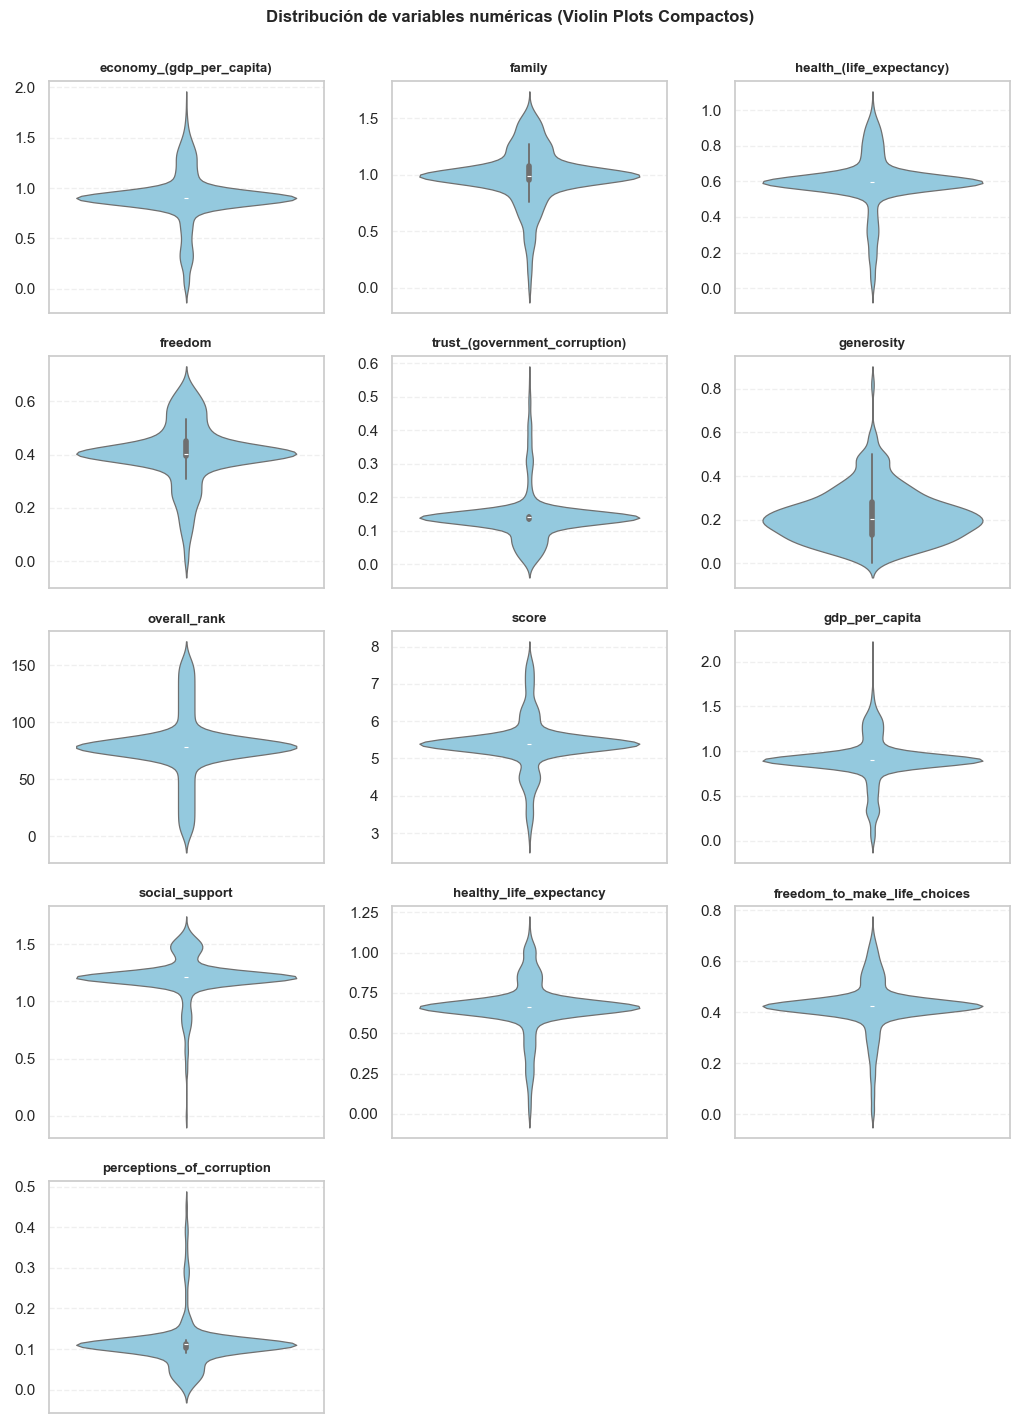

In [266]:
# ===========================================================
# DISTRIBUCIÓN DE VARIABLES NUMÉRICAS (Violin Plots Compactos)
# ===========================================================

# Seleccionamos solo las columnas numéricas
numericas = df.select_dtypes(include='number')

# Cantidad de filas según número de variables (3 por línea)
num_vars = len(numericas.columns)
filas = int(np.ceil(num_vars / 3))

# 🔹 Figura más compacta (30% más pequeña)
plt.figure(figsize=(10.5, 2.8 * filas))  # antes era (15, 4 * filas)

# Creamos un gráfico por variable
for i, col in enumerate(numericas.columns, 1):
    plt.subplot(filas, 3, i)
    sns.violinplot(data=numericas, y=col, color="skyblue", inner="box", linewidth=0.9)
    plt.title(col, fontsize=9.5, weight='bold')
    plt.xlabel("")
    plt.ylabel("")
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)

# Ajustes visuales
plt.tight_layout(pad=1.5)
plt.suptitle("Distribución de variables numéricas (Violin Plots Compactos)", 
             fontsize=12, weight='bold', y=1.02)
plt.show()


Importante: El conjunto de datos es consistente, válido y representativo.
Los outliers observados son reales (no errores), reflejando las diferencias socioeconómicas entre países.
Las variables muestran patrones lógicos y distribuciones razonables, lo que permite avanzar con confianza hacia las siguientes etapas del análisis:
correlaciones, comparación entre regiones y modelado explicativo de la felicidad.

HEATMAP GENERAL DE CORRELACIONES: Este bloque te muestra cómo se relacionan entre sí todas las variables numéricas del dataset.

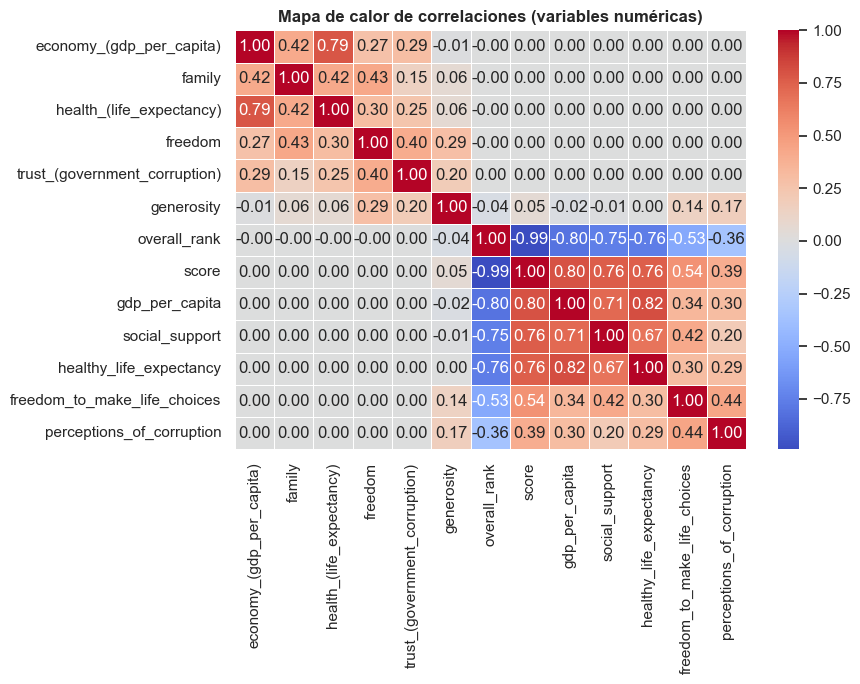

In [271]:
plt.figure(figsize=(9,7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de calor de correlaciones (variables numéricas)", fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


CORRELACIÓN CON LA FELICIDAD (score): Este bloque te dice qué variables influyen más en la felicidad (score).
Las más altas (más cercanas a 1) tienen relación directa fuerte.
Las cercanas a 0 tienen poca relación, y las negativas la tienen inversa.

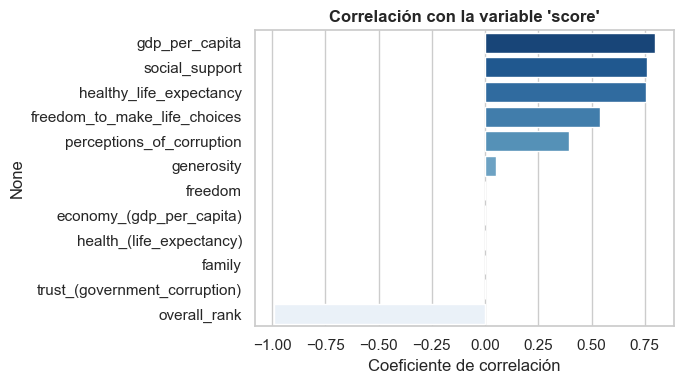

In [273]:
plt.figure(figsize=(7,4))
sns.barplot(
    x=corr_con_score.values,
    y=corr_con_score.index,
    hue=corr_con_score.index,
    palette="Blues_r",
    legend=False
)
plt.title("Correlación con la variable 'score'", fontsize=12, weight='bold')
plt.xlabel("Coeficiente de correlación")
plt.tight_layout()
plt.show()


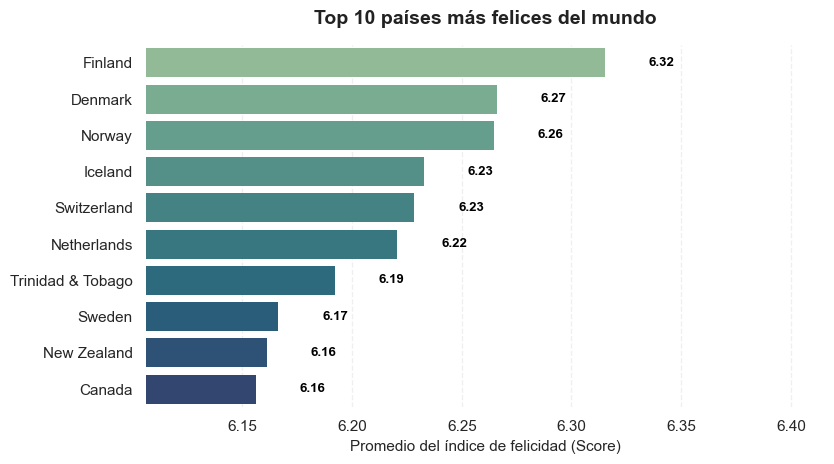

In [281]:
# ===========================================================
# 🎯 Top 10 países más felices (valores fuera de la barra)
# ===========================================================
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Paleta profesional: degradado suave de verde a azul
palette = sns.color_palette("crest", n_colors=10)

# Estilo general
sns.set_style("whitegrid")
plt.figure(figsize=(8.5, 4.8))

# Gráfico de barras horizontales
ax = sns.barplot(
    x=top10.values,
    y=top10.index,
    palette=palette,
    edgecolor="none"
)

# Título
plt.title(
    "Top 10 países más felices del mundo",
    fontsize=14,
    weight='bold',
    color='#222222',
    pad=15
)

# Etiquetas de ejes
plt.xlabel("Promedio del índice de felicidad (Score)", fontsize=11)
plt.ylabel("")

# Mostrar valores fuera de las barras (alineados)
for i, v in enumerate(top10.values):
    plt.text(
        v + 0.02,     # desplazado a la derecha de la barra
        i, 
        f"{v:.2f}", 
        va='center',
        ha='left',
        fontsize=9.5,
        color='#000000',   # texto negro
        weight='bold'
    )

# Ajustes estéticos
plt.xlim(top10.min() - 0.05, top10.max() + 0.1)
sns.despine(left=True, bottom=True)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [283]:
print(df['year'].unique())
print(df.groupby('year')['score'].mean())


['2015' '2016' '2017' '2018' '2019']
year
2015    5.391506
2016    5.391506
2017    5.391506
2018    5.375917
2019    5.407096
Name: score, dtype: float64


In [285]:
import pandas as pd
for year in ['2015', '2016', '2017', '2018', '2019']:
    temp = pd.read_csv(f"../data/{year}.csv")
    print(f"{year}: promedio score = {temp['Happiness Score'].mean():.3f}, filas = {len(temp)}")


2015: promedio score = 5.376, filas = 158
2016: promedio score = 5.382, filas = 157


KeyError: 'Happiness Score'

In [286]:
import pandas as pd
for year in ['2015', '2016', '2017', '2018', '2019']:
    temp = pd.read_csv(f"../data/{year}.csv")
    print(f"\n🔹 {year} → columnas:")
    print(temp.columns.tolist())



🔹 2015 → columnas:
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

🔹 2016 → columnas:
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

🔹 2017 → columnas:
['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']

🔹 2018 → columnas:
['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

🔹 2019 → columnas:
['Over